### Importing Python Libraries

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Importing NLTK packages
import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize,word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer as tf
from collections import Counter
from wordcloud import WordCloud

#Importing warnings
import warnings
warnings.filterwarnings('ignore')

### Reading the datasets

In [2]:
#Reading the csv file of train data
train_data=pd.read_csv(r'C:\Users\satvi\OneDrive\Desktop\nlp_train-dataset.csv')
train_data.head()

,patient_id,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed,base_score
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,8.022969
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,7.858458
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,6.341969
3,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,6.590176
4,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,28-Nov-15,43,6.144782


In [3]:
#Reading the test data
test_data=pd.read_csv(r'C:\Users\satvi\OneDrive\Desktop\nlp_test-dataset.csv')
test_data.head()

,patient_id,name_of_drug,review_by_patient,drug_approved_by_UIC,number_of_times_prescribed,use_case_for_drug,effectiveness_rating
0,163740,Mirtazapine,"""I&#039;ve tried a few antidepressants over th...",28-Feb-12,22,Depression,10
1,39293,Contrave,"""Contrave combines drugs that were used for al...",5-Mar-17,35,Weight Loss,9
2,208087,Zyclara,"""4 days in on first 2 weeks. Using on arms an...",3-Jul-14,13,Keratosis,4
3,23295,Methadone,"""Ive been on Methadone for over ten years and ...",18-Oct-16,21,Opiate Withdrawal,7
4,97013,Ambien,"""Ditto on rebound sleepless when discontinued....",13-Jan-15,44,Insomnia,2


### Shape of the datasets

In [4]:
#checking for the shape of the dataset
train_data.shape

(32165, 8)

In the train dataset there are 32165 records and 8 columns

In [5]:
#checking the shape
test_data.shape

(10760, 7)

In the test dataset there are 10760 rows and 7 columns

### Data Preprocessing

In [6]:
#checking for null values
train_data.isnull().sum()

patient_id                    0
name_of_drug                  0
use_case_for_drug             0
review_by_patient             0
effectiveness_rating          0
drug_approved_by_UIC          0
number_of_times_prescribed    0
base_score                    0
dtype: int64

There are no null values in the train dataset

### Heat map for visualisation

<AxesSubplot:>

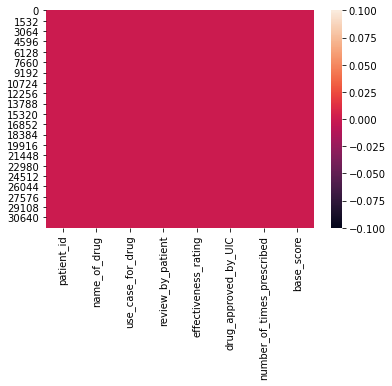

In [7]:
#checking the null values by plotting heat map
sns.heatmap(train_data.isnull())

In [8]:
#checking the null values in testing dataset
test_data.isnull().sum()

patient_id                    0
name_of_drug                  0
review_by_patient             0
drug_approved_by_UIC          0
number_of_times_prescribed    0
use_case_for_drug             0
effectiveness_rating          0
dtype: int64

<AxesSubplot:>

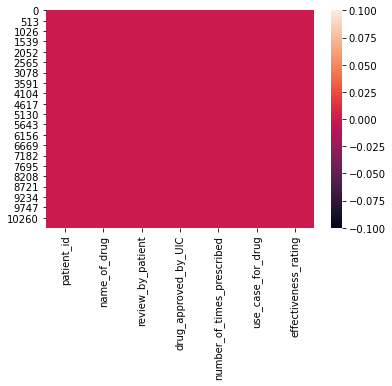

In [9]:
#checking the null values in testing dataset by plotting heat map
sns.heatmap(test_data.isnull())

In [10]:
#checking for type of the data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32165 entries, 0 to 32164
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   patient_id                  32165 non-null  int64  
 1   name_of_drug                32165 non-null  object 
 2   use_case_for_drug           32165 non-null  object 
 3   review_by_patient           32165 non-null  object 
 4   effectiveness_rating        32165 non-null  int64  
 5   drug_approved_by_UIC        32165 non-null  object 
 6   number_of_times_prescribed  32165 non-null  int64  
 7   base_score                  32165 non-null  float64
dtypes: float64(1), int64(3), object(4)
memory usage: 2.0+ MB


There are different data type values present in the columns, as the label data is float type the type of problem is regression.

In [11]:
#checking for type of test data
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10760 entries, 0 to 10759
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   patient_id                  10760 non-null  int64 
 1   name_of_drug                10760 non-null  object
 2   review_by_patient           10760 non-null  object
 3   drug_approved_by_UIC        10760 non-null  object
 4   number_of_times_prescribed  10760 non-null  int64 
 5   use_case_for_drug           10760 non-null  object
 6   effectiveness_rating        10760 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 588.6+ KB


In [12]:
# checking for stats
train_data.describe()

,patient_id,effectiveness_rating,number_of_times_prescribed,base_score
count,32165.000000,32165.000000,32165.000000,32165.000000
mean,115487.511052,6.998912,27.893207,6.664261
std,67146.156602,3.274781,35.819035,1.588699
min,9.000000,1.000000,0.000000,0.899076
25%,56922.000000,5.000000,6.000000,6.109307
50%,115776.000000,8.000000,16.000000,6.788245
75%,173562.000000,10.000000,36.000000,7.900790
max,232289.000000,10.000000,771.000000,8.992453


From describe method we get statistical information of data like mean, standard deviation,minium value, maximum value, 50% value,75% value.

In [13]:
# checking for stats
test_data.describe()

,patient_id,number_of_times_prescribed,effectiveness_rating
count,10760.000000,10760.000000,10760.000000
mean,116515.126487,27.596004,6.963755
std,66889.245383,34.050059,3.275637
min,21.000000,0.000000,1.000000
25%,58079.000000,6.000000,4.000000
50%,116756.500000,16.000000,8.000000
75%,174256.500000,35.000000,10.000000
max,232253.000000,484.000000,10.000000


In [14]:
#Dropping the unwanted column
train_data.drop(columns=['drug_approved_by_UIC'],axis=1,inplace=True)
test_data.drop(columns=['drug_approved_by_UIC'],axis=1,inplace=True)

Dropping the unwanted colum which is not that important for our label prediction.

### Categorical variables

In [15]:
#Checking of the count 
train_data['name_of_drug'].value_counts()

Levonorgestrel                                          724
Etonogestrel                                            628
Ethinyl estradiol / norethindrone                       547
Ethinyl estradiol / norgestimate                        425
Nexplanon                                               397
                                                       ... 
Lesinurad                                                 1
Selsun Blue                                               1
Benemid                                                   1
Acetaminophen / dexbrompheniramine / pseudoephedrine      1
Ulesfia                                                   1
Name: name_of_drug, Length: 2220, dtype: int64

From value counts we got to know that many of the patients uses levonorestrel drug.

In [17]:
#checking value counts
test_data['name_of_drug'].value_counts()

Levonorgestrel                                     269
Etonogestrel                                       202
Ethinyl estradiol / norethindrone                  181
Nexplanon                                          145
Ethinyl estradiol / norgestimate                   127
                                                  ... 
Ethinyl estradiol / folic acid / levonorgestrel      1
Dupilumab                                            1
Aubagio                                              1
Olodaterol                                           1
Metformin / sitagliptin                              1
Name: name_of_drug, Length: 1478, dtype: int64

In [18]:
#checking values counts for use case for drug
train_data['use_case_for_drug'].value_counts()

Birth Control                 5795
Depression                    1791
Pain                          1273
Anxiety                       1174
Acne                          1101
                              ... 
Labor Induction                  1
Pupillary Dilation               1
B12 Nutritional Deficiency       1
Ocular Rosacea                   1
Sore Throat                      1
Name: use_case_for_drug, Length: 636, dtype: int64

The type of drug used by many patients are for birth control.

### visualing the most frequently used words by patients in reviews

In [19]:
train_data['review_by_patient']

0        "It has no side effect, I take it in combinati...
1        "My son is halfway through his fourth week of ...
2        "I used to take another oral contraceptive, wh...
3        "Suboxone has completely turned my life around...
4        "2nd day on 5mg started to work with rock hard...
                               ...                        
32160    "I have been taking Cymbalta for 15 months now...
32161    "I have had the Nexplanon since Dec. 27, 2016 ...
32162    "Had panic attacks and social anxiety starting...
32163    "I have been off Prozac for about 4 weeks now....
32164    "Limited improvement after 4 months, developed...
Name: review_by_patient, Length: 32165, dtype: object

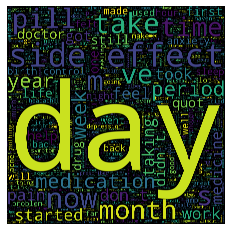

In [20]:
# Wordcloud for visualising frequently used words
word_cloud_text = ''.join(train_data['review_by_patient'])

wordcloud = WordCloud(max_font_size=1000, # Maximum font size for the largest word
                      max_words=4000, # The maximum number of words
                      background_color="black", # Background color for the word cloud image
                      scale = 10, # Scaling between computation and drawing
                      width=1000, # Width of the canvas
                      height=1000 # Height of the canvas
                     ).generate(word_cloud_text)

plt.figure()
plt.imshow(wordcloud, 
           interpolation="bilinear") # to make the displayed image appear more smoothly
plt.axis("off")
plt.show()

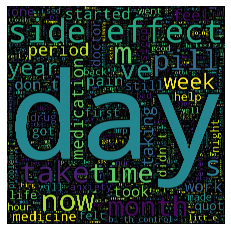

In [21]:
# Wordcloud for visualising frequently used words
word_cloud_text = ''.join(test_data['review_by_patient'])

wordcloud = WordCloud(max_font_size=1000, # Maximum font size for the largest word
                      max_words=4000, # The maximum number of words
                      background_color="black", # Background color for the word cloud image
                      scale = 10, # Scaling between computation and drawing
                      width=1000, # Width of the canvas
                      height=1000 # Height of the canvas
                     ).generate(word_cloud_text)

plt.figure()
plt.imshow(wordcloud, 
           interpolation="bilinear") # to make the displayed image appear more smoothly
plt.axis("off")
plt.show()

### Preprocessing the reviews column

In [22]:
#Preprocessing the data removing all the unwanted words
train_data['review_by_patient'] = train_data['review_by_patient'].str.lower()
train_data['review_by_patient'] = train_data['review_by_patient'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')
train_data['review_by_patient'] = train_data['review_by_patient'].str.replace(r'£|\$', 'dollers')
train_data['review_by_patient'] = train_data['review_by_patient'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')
train_data['review_by_patient'] = train_data['review_by_patient'].str.replace(r'\d+(\.\d+)?', 'numbr')
train_data['review_by_patient'] = train_data['review_by_patient'].str.replace(r'[^\w\d\s]', ' ')
train_data['review_by_patient'] = train_data['review_by_patient'].str.replace(r'\s+', ' ')
train_data['review_by_patient'] = train_data['review_by_patient'].str.replace(r'^\s+|\s+?$', '')
train_data.head()

,patient_id,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,number_of_times_prescribed,base_score
0,206461,Valsartan,Left Ventricular Dysfunction,it has no side effect i take it in combination...,9,27,8.022969
1,95260,Guanfacine,ADHD,my son is halfway through his fourth week of i...,8,192,7.858458
2,92703,Lybrel,Birth Control,i used to take another oral contraceptive whic...,5,17,6.341969
3,35696,Buprenorphine / naloxone,Opiate Dependence,suboxone has completely turned my life around ...,9,37,6.590176
4,155963,Cialis,Benign Prostatic Hyperplasia,numbrnd day on numbrmg started to work with ro...,2,43,6.144782


In [23]:
#Removing the stop words from the sentence
from nltk.stem import WordNetLemmatizer
stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
train_data['review_by_patient'] = train_data['review_by_patient'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

lem=WordNetLemmatizer()
train_data['review_by_patient'] = train_data['review_by_patient'].apply(lambda x: ' '.join(
 lem.lemmatize(t) for t in x.split()))

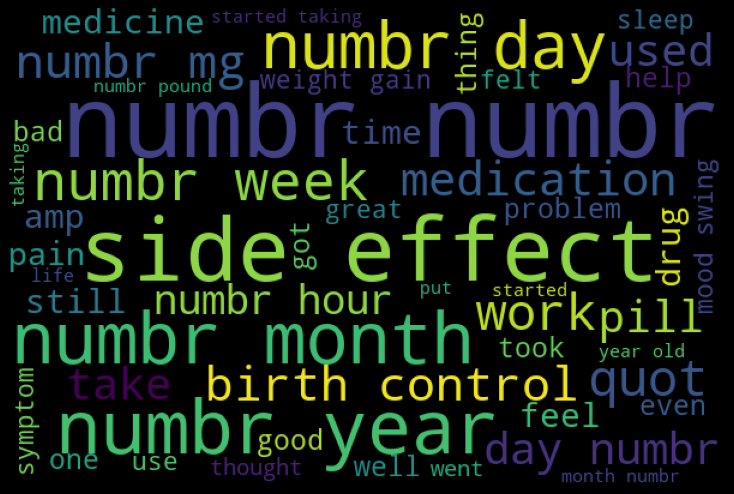

In [24]:
#Most frequently used words after cleaning the data
from wordcloud import WordCloud
highlym = train_data['review_by_patient']
spam_cloud = WordCloud(width=600,height=400,background_color='black',max_words=50).generate(' '.join(highlym))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()


In [25]:
train_data

,patient_id,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,number_of_times_prescribed,base_score
0,206461,Valsartan,Left Ventricular Dysfunction,side effect take combination bystolic numbr mg...,9,27,8.022969
1,95260,Guanfacine,ADHD,son halfway fourth week intuniv became concern...,8,192,7.858458
2,92703,Lybrel,Birth Control,used take another oral contraceptive numbr pil...,5,17,6.341969
3,35696,Buprenorphine / naloxone,Opiate Dependence,suboxone completely turned life around feel he...,9,37,6.590176
4,155963,Cialis,Benign Prostatic Hyperplasia,numbrnd day numbrmg started work rock hard ere...,2,43,6.144782
...,...,...,...,...,...,...,...
32160,183202,Cymbalta,Anxiety,taking cymbalta numbr month first numbrmg six ...,9,89,6.963020
32161,109111,Nexplanon,Birth Control,nexplanon since dec numbr numbr got first peri...,6,0,0.899076
32162,121154,Venlafaxine,Panic Disorde,panic attack social anxiety starting adolescen...,9,25,6.241812
32163,45410,Fluoxetine,Obsessive Compulsive Disorde,prozac numbr week starting numbr year ago terr...,8,22,7.940428


In [26]:
#preprocessing the test data
test_data['review_by_patient'] = test_data['review_by_patient'].str.lower()
test_data['review_by_patient'] = test_data['review_by_patient'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')
test_data['review_by_patient'] = test_data['review_by_patient'].str.replace(r'£|\$', 'dollers')
test_data['review_by_patient'] = test_data['review_by_patient'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')
test_data['review_by_patient'] = test_data['review_by_patient'].str.replace(r'\d+(\.\d+)?', 'numbr')
test_data['review_by_patient'] = test_data['review_by_patient'].str.replace(r'[^\w\d\s]', ' ')
test_data['review_by_patient'] = test_data['review_by_patient'].str.replace(r'\s+', ' ')
test_data['review_by_patient'] = test_data['review_by_patient'].str.replace(r'^\s+|\s+?$', '')
test_data.head()

,patient_id,name_of_drug,review_by_patient,number_of_times_prescribed,use_case_for_drug,effectiveness_rating
0,163740,Mirtazapine,i numbr ve tried a few antidepressants over th...,22,Depression,10
1,39293,Contrave,contrave combines drugs that were used for alc...,35,Weight Loss,9
2,208087,Zyclara,numbr days in on first numbr weeks using on ar...,13,Keratosis,4
3,23295,Methadone,ive been on methadone for over ten years and c...,21,Opiate Withdrawal,7
4,97013,Ambien,ditto on rebound sleepless when discontinued i...,44,Insomnia,2


In [27]:
#Removing stop words from the sentence
stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
test_data['review_by_patient'] = test_data['review_by_patient'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

lem=WordNetLemmatizer()
test_data['review_by_patient'] = test_data['review_by_patient'].apply(lambda x: ' '.join(lem.lemmatize(t) for t in x.split()))

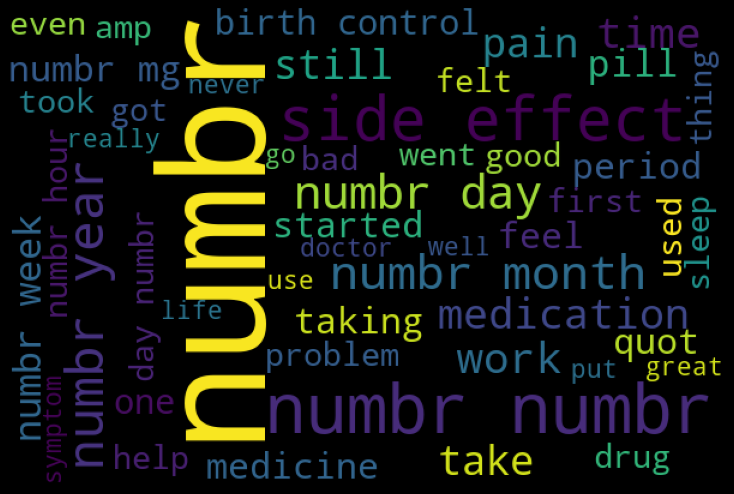

In [28]:
#Most frequently used words
from wordcloud import WordCloud
highlym = test_data['review_by_patient']
spam_cloud = WordCloud(width=600,height=400,background_color='black',max_words=50).generate(' '.join(highlym))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()


In [29]:
#Downloading the nltk package vader_lexicon
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\satvi\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [30]:
#Importing sentiment intensity analyser for analysing the sentiments
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

# Create list (cast to array) of compound polarity sentiment scores for reviews
train_sentiments = []
test_sentiments = []

for i in train_data.review_by_patient:
    train_sentiments.append(sid.polarity_scores(i).get('compound'))
    
for i in test_data.review_by_patient:
    test_sentiments.append(sid.polarity_scores(i).get('compound'))   
    
train_sentiments = np.asarray(train_sentiments)
test_sentiments  = np.asarray(test_sentiments)

In [31]:
#converting 
train_data['sentiment'] = pd.Series(data=train_sentiments)
test_data['sentiment'] = pd.Series(data=test_sentiments)

In [32]:
test_data.head(5)

,patient_id,name_of_drug,review_by_patient,number_of_times_prescribed,use_case_for_drug,effectiveness_rating,sentiment
0,163740,Mirtazapine,numbr tried antidepressant year citalopram flu...,22,Depression,10,0.7623
1,39293,Contrave,contrave combine drug used alcohol smoking opi...,35,Weight Loss,9,0.8166
2,208087,Zyclara,numbr day first numbr week using arm face put ...,13,Keratosis,4,0.3818
3,23295,Methadone,ive methadone ten year currently trying get dr...,21,Opiate Withdrawal,7,0.2023
4,97013,Ambien,ditto rebound sleepless discontinued done stra...,44,Insomnia,2,-0.5574


Text(0, 0.5, 'Count')

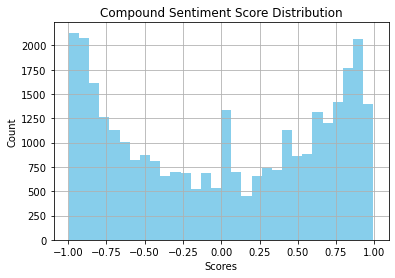

In [33]:
train_data.sentiment.hist(color='skyblue', bins=30)
plt.title('Compound Sentiment Score Distribution')
plt.xlabel('Scores')
plt.ylabel('Count')


([<matplotlib.axis.XTick at 0x2781c5d1c70>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

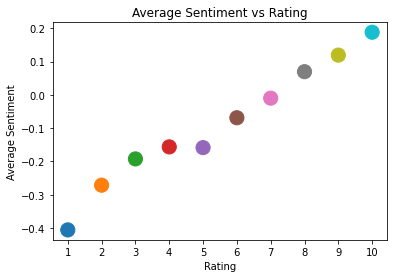

In [34]:
temp_ls = []

for i in range(1, 11):
    temp_ls.append(np.sum(train_data[train_data.effectiveness_rating == i].sentiment) / np.sum(train_data.effectiveness_rating == i))
    

plt.scatter(x=range(1, 11), y=temp_ls, c=range(1, 11), cmap='tab10', s=200)
plt.title('Average Sentiment vs Rating')
plt.xlabel('Rating')
plt.ylabel('Average Sentiment')
plt.xticks([i for i in range(1, 11)])


([<matplotlib.axis.XTick at 0x27820e660d0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

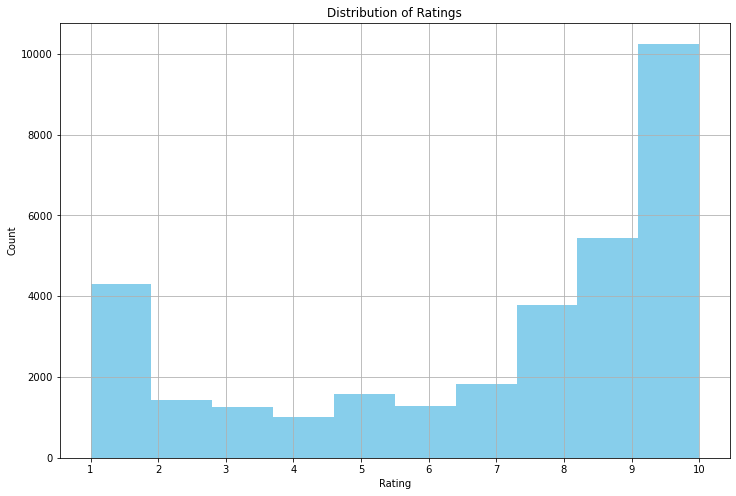

In [35]:
# Look at bias in review (also shown on 'Data' page in competition: distribution of ratings)
plt.rcParams['figure.figsize'] = [12, 8]
train_data.effectiveness_rating.hist(color='skyblue')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks([i for i in range(1, 11)])

In [36]:
# Create a list (cast into an array) containing the average usefulness for given ratings
use_ls = []

for i in range(1, 11):
    use_ls.append([i, np.sum(train_data[train_data.effectiveness_rating == i].number_of_times_prescribed) / np.sum([train_data.effectiveness_rating == i])])
    
use_arr = np.asarray(use_ls)

([<matplotlib.axis.XTick at 0x27820c2aa30>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

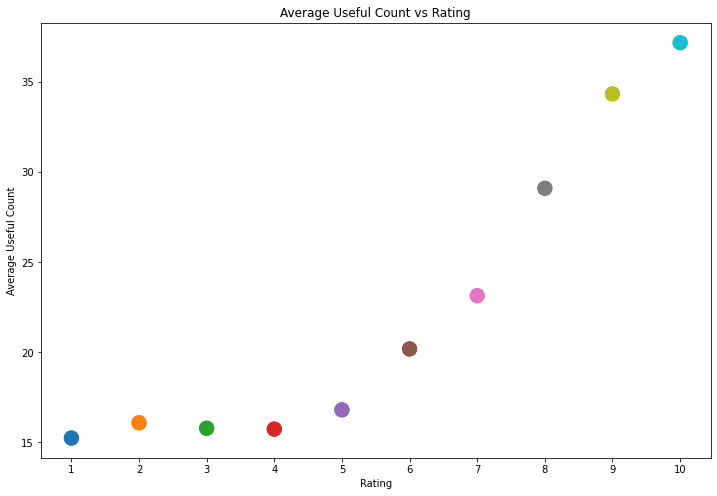

In [37]:
plt.scatter(use_arr[:, 0], use_arr[:, 1], c=use_arr[:, 0], cmap='tab10', s=200)
plt.title('Average Useful Count vs Rating')
plt.xlabel('Rating')
plt.ylabel('Average Useful Count')
plt.xticks([i for i in range(1, 11)])
plt.scatter(use_arr[:, 0], use_arr[:, 1], c=use_arr[:, 0], cmap='tab10', s=200)
plt.title('Average Useful Count vs Rating')
plt.xlabel('Rating')
plt.ylabel('Average Useful Count')
plt.xticks([i for i in range(1, 11)])


1.People found reviews with higher scores to be more useful

2.Reviews with high ratings recieved more useful tags than reviews with low ratings.

In [38]:
# Sort train dataframe from most to least useful
train_data = train_data.sort_values(by='sentiment', ascending=False)
train_data.iloc[:10]

,patient_id,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,number_of_times_prescribed,base_score,sentiment
11245,137054,Isotretinoin,Acne,hope review help someone numbr considering try...,10,29,8.469380,0.9932
7113,30018,Klonopin,Anxiety,much much better get much better calming feeli...,10,70,6.673901,0.9914
16886,179115,Olanzapine,Bipolar Disorde,got prescribed medication numbrmg start numbr ...,5,11,5.881281,0.9893
23713,179825,Adapalene / benzoyl peroxide,Acne,hi using epiduo last numbr week numbr best exp...,3,2,8.309529,0.9888
14859,219684,Taytulla,Birth Control,numbr taking taytulla numbr month day one grea...,10,2,8.074493,0.9888
23674,105449,Afrezza,"Diabetes, Type 1",thanks sanofi giving great product miracle nee...,10,53,8.664924,0.9885
3804,33710,Microgestin Fe 1 / 20,Birth Control,pill numbr month getting depo shot numbr month...,6,9,6.258642,0.9882
29466,148461,Mirena,Birth Control,numbr prayer someone read put poison body refe...,1,12,3.535176,0.9877
18762,39612,Contrave,Obesity,numbr completed week numbr numbr pill morning ...,8,35,7.818854,0.9872
13083,153495,Doxycycline,Rosacea,love love love oracea numbr week already notic...,10,70,6.673901,0.9871


### After analysing the reviews i got to know that the reviews are mostly given based on how many times a patient used the drug and about side effects.So, I feel review column is not that important for the precition of base score but in order not to loose the data i will label encode it and build the model. 

In [39]:
#dividing the training data into x and y
x=train_data.drop(columns=['base_score'])
y=train_data['base_score']

In [40]:
#Taking the features from the train set accoring to the test set that make easy  to train the prediction model
x= x[["patient_id","name_of_drug","review_by_patient","number_of_times_prescribed","use_case_for_drug","effectiveness_rating"]]

In [41]:
#Encoding the text column values in train and test data set to numeric value 
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()

In [42]:
#Encoding 
X= x.apply(lab_enc.fit_transform)
test= test_data.apply(lab_enc.fit_transform)
X.head()

,patient_id,name_of_drug,review_by_patient,number_of_times_prescribed,use_case_for_drug,effectiveness_rating
11245,19028,1052,8449,29,42,9
7113,4237,1087,11969,70,76,9
16886,24908,1465,7410,11,109,4
23713,25009,50,8333,2,42,2
14859,30450,1922,15854,2,110,9


<AxesSubplot:xlabel='effectiveness_rating', ylabel='Density'>

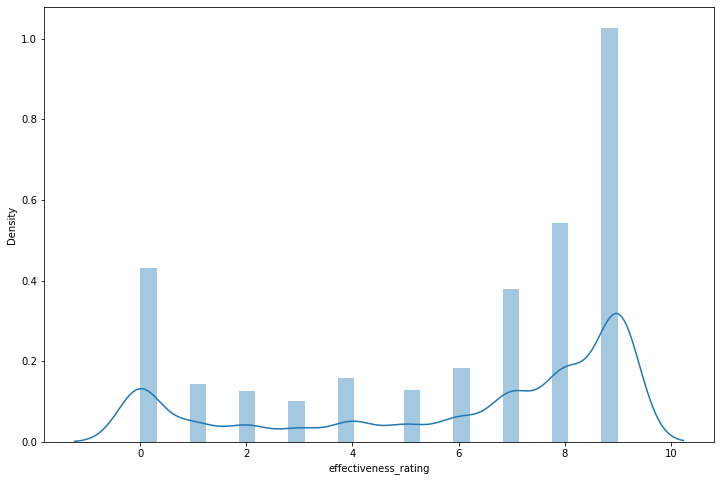

In [43]:
# Ploting the distribution plot on the effectiveness rating to know how it is distributed
sns.distplot(X['effectiveness_rating'])

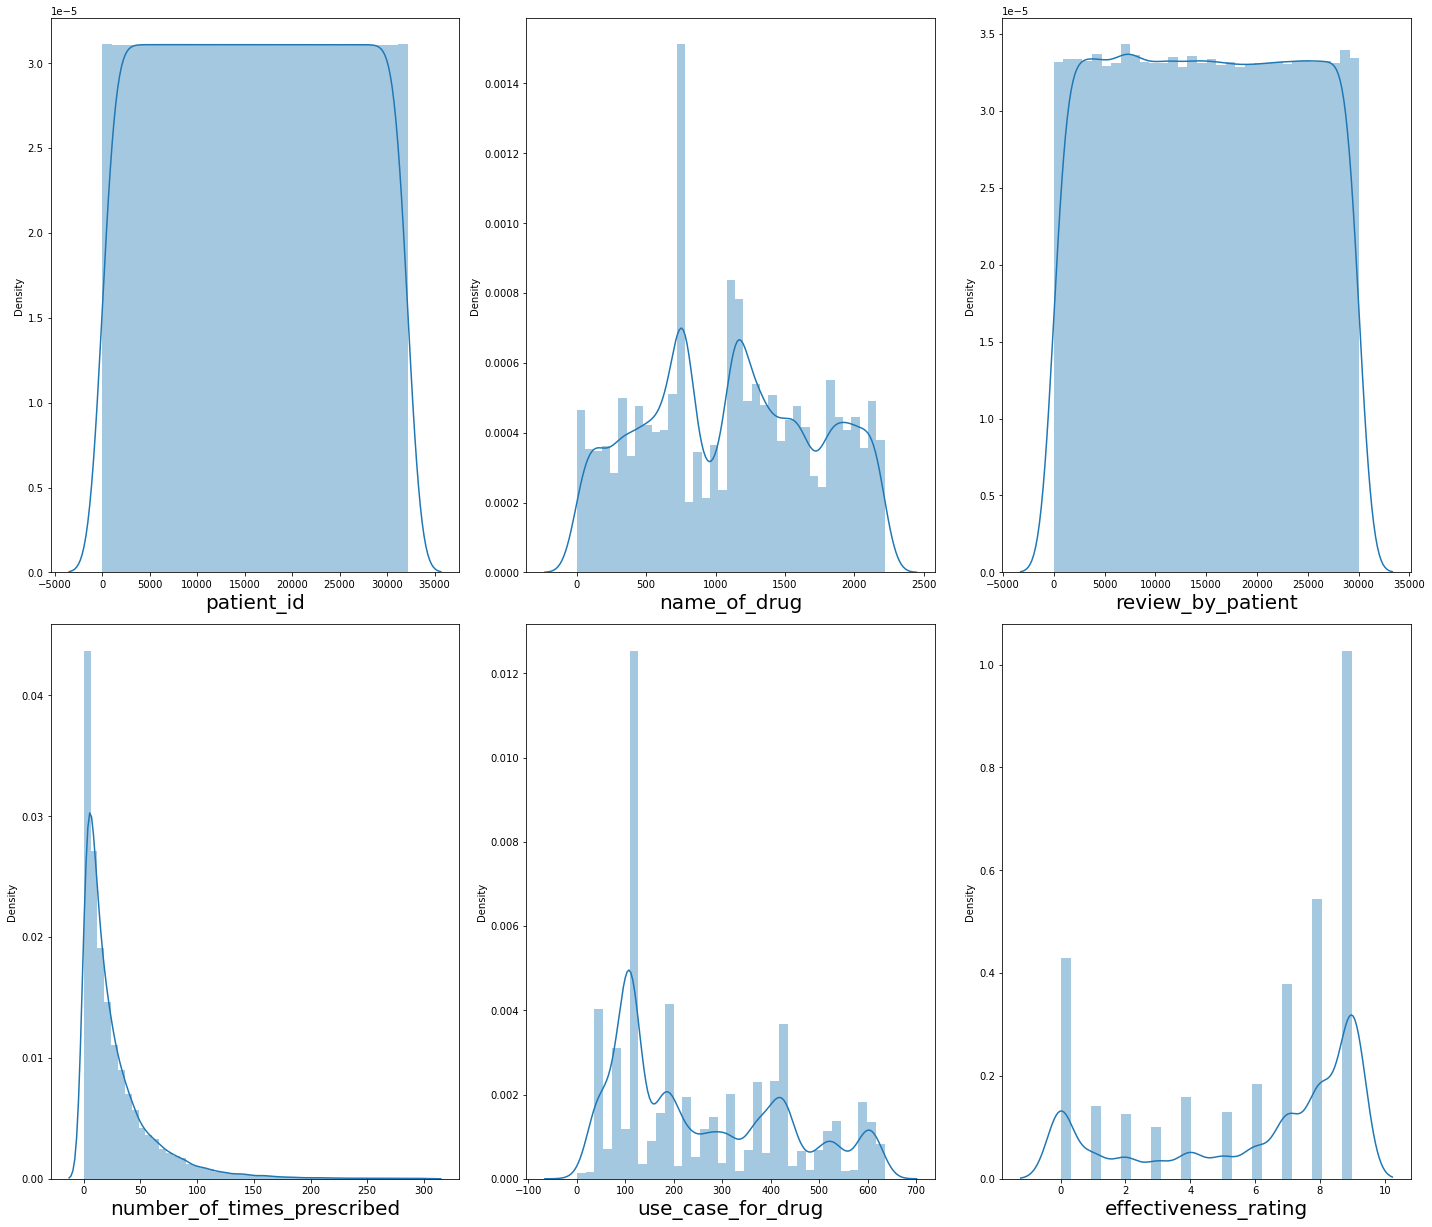

In [44]:
#Now lets plot dist plot and visualise how the data is distributed in each column
#lets plot the distribution plot to check the distribution of our data
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in X:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(X[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()


In [45]:
#To know how the dataset is correlated with other columns
cor=X.corr()
cor

,patient_id,name_of_drug,review_by_patient,number_of_times_prescribed,use_case_for_drug,effectiveness_rating
patient_id,1.000000,-0.016277,-0.008234,0.018094,-0.016597,0.018898
name_of_drug,-0.016277,1.000000,0.046093,0.022701,0.081260,0.005041
review_by_patient,-0.008234,0.046093,1.000000,0.024141,0.038640,0.001057
number_of_times_prescribed,0.018094,0.022701,0.024141,1.000000,0.099391,0.251139
use_case_for_drug,-0.016597,0.081260,0.038640,0.099391,1.000000,0.053078
effectiveness_rating,0.018898,0.005041,0.001057,0.251139,0.053078,1.000000


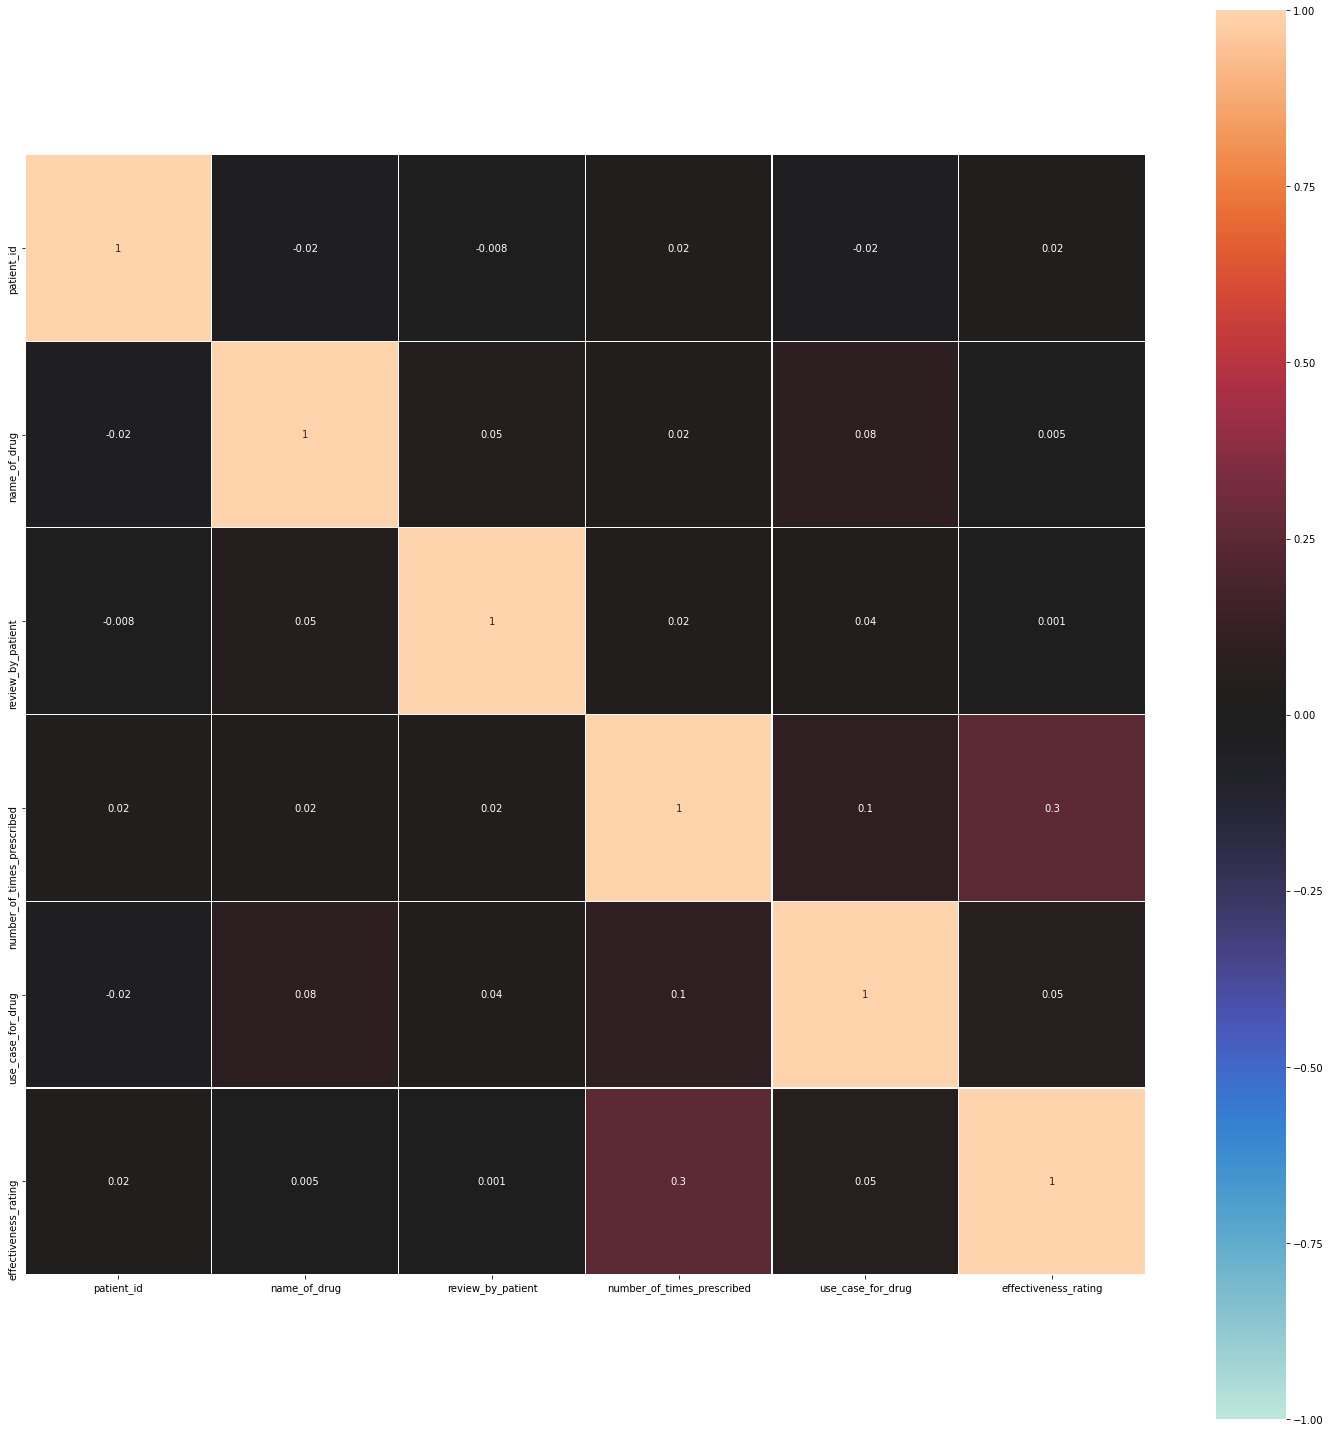

In [46]:
#Plotting Heat map to find correlation
plt.figure(figsize=(20,20))
sns.heatmap(X.corr(),vmin=-1,annot=True,square=True,center=0,fmt='.1g',linewidth=0.2)
plt.tight_layout()

The light coloured are highly correlated and dark coloured are less correlated.

<AxesSubplot:xlabel='name_of_drug', ylabel='number_of_times_prescribed'>

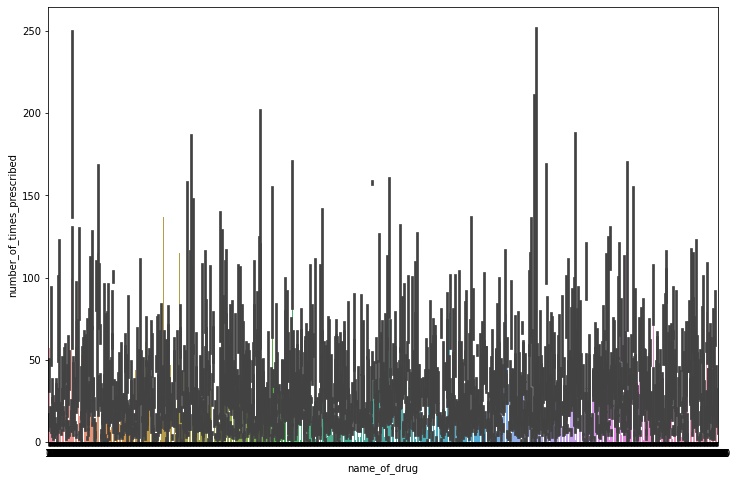

In [47]:
#Plotting bar plot
sns.barplot(X['name_of_drug'],X['number_of_times_prescribed'])

In [48]:
#Importing the prediction model from scikit library 
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor

In [49]:
#initializing the models
m1 = LinearRegression()
m2 = KNeighborsRegressor()
m3 = DecisionTreeRegressor()
m4= RandomForestRegressor()
m5 = XGBRegressor()

In [53]:
#fitting the input data to the model or training the data to model
m1.fit(X,y)
m2.fit(X,y)
m3.fit(X,y)
m4.fit(X,y)
m5.fit(X,y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [57]:
#Predicting the label on test data for all models
y_pred_lr = m1.predict(test)
y_pred_knn = m2.predict(test)
y_pred_dt = m3.predict(test)
y_pred_rf = m4.predict(test)
y_pred_xgb = m5.predict(test)

### Predicted values by all models

In [63]:
y_pred_lr

array([7.25727196, 7.0488215 , 6.06372761, ..., 7.30067393, 6.84358284,
       7.0659211 ])

In [64]:
y_pred_knn

array([6.4110083 , 7.04309134, 6.90137537, ..., 7.04009446, 5.48726718,
       7.53027933])

In [65]:
y_pred_dt

array([8.75720098, 8.74503683, 5.95227783, ..., 6.78824482, 5.30523211,
       8.19393369])

In [66]:
y_pred_xgb

array([8.757167 , 8.776938 , 5.8556404, ..., 6.797969 , 5.1854343,
       8.205858 ], dtype=float32)

In [59]:
y_pred_rf

array([8.75720098, 8.74503683, 5.95227783, ..., 6.78824482, 5.30523211,
       8.19393369])

In [67]:
#making a DataFrame to store the result 
result= pd.DataFrame()
result['patient_id'] = test['patient_id']
# xgb model predictions on the test dataset
result['base_score'] = y_pred_xgb 
#storing result into csv file
result.to_csv('base_scores.csv', index=False)
print('Saved the file')

Saved the file


In [70]:
#Reading the csv file
result = pd.read_csv('base_scores.csv')
result

,patient_id,base_score
0,7573,8.757167
1,1821,8.776938
2,9665,5.855640
3,1051,5.865614
4,4427,5.191447
...,...,...
10755,6956,6.168174
10756,6427,3.994071
10757,7387,6.797969
10758,6045,5.185434
